In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import os

In [2]:
workDir= os.getcwd()
outputDir= workDir+'/outputPlots/'

In [3]:
def lambda_NP(x, tauN):
    return (255./(tauN*x**5.))*(12. + 6.*x + x**2.) # Dod Eq. 3.29

def tauNeutron(Q, mn0, mn):
    if (Q<0):
        tauN = 886.7 #10**10
        print 'NOT RETURNING TAU_N but TAU_P'
    else:
        tauN= 886.7*(mn0/mn)  #*abs(Q/1.294)  # sec; neturon lifetime
        
    return tauN

def H1(Q, gstar= 10.75): # based on Dod Eq. 3.28
        DodQ= 1.293
        G=  1.13**2*45./(4*np.pi**3.*gstar*DodQ**4)
        return np.sqrt(4.*np.pi**3*G*Q**4/45.)*np.sqrt(gstar) 

In [4]:
def neutronAbundance(mp, mn, Xn0, title, mn0,
                     xEqFactorToPlot= 2.,
                     yMin= 10**-5, yMax=10**0,
                     savePlots= False, outDir= None, filenameTag= ''):
    Q= mn-mp   # MeV
    
    tauN = tauNeutron(Q, mn0, mn)
    
    print 'Q= ', Q
    print 'tauN= ', tauN
    
    def dXndx(Xn, x, gstar= 10.75):
        factor= x*lambda_NP(x, tauN)*(mp/mn)**(3./2.)/H1(Q, gstar= gstar)
        dXndx = factor*(np.exp(-x) - Xn*(1. + np.exp(-x)))
        return dXndx
    
    def dXpdx(Xp, x, gstar= 10.75):
        factor= x*lambda_NP(abs(x), tauN)*(mn/mp)**(3./2.)/H1(Q, gstar= gstar)
        dXpdx = factor*(np.exp(x) - Xp*(1. + np.exp(x)))
        return dXpdx
     
    # plot T vs. Xn
    if (Q>0): 
        T = np.logspace(0,-3, 200)    # 1-0.1MeV
        x= Q/T
        Xn = odeint(dXndx, Xn0, x, args= (10.75,))
        plt.plot(T, Xn[:,0], '.', color='b', label= '$X_n$')
        plt.plot(T, Xn[:,0], color='b')

        #T = np.logspace(0,-1, 200)    # 1-0.1MeV
        #x= Q/T
        #result = odeint(dXndx, Xn0, x, args= (10.75,))
        #T2 = np.logspace(np.log10(T[-1]),-3, 200)    # 0.1-10^-3 MeV
        #x2= Q/T2
        #result2 = odeint(dXndx, result[:,0][-1], x2, args= (3.36,))
        #t= 132.*(0.1/T2)**2
        #plt.plot(T2, result2[:,0]*np.exp(-t/tauN), '.', color='r') #, label= '$X_n$')
        #plt.plot(T2, result2[:,0]*np.exp(-t/tauN), color='r')

        T = np.logspace(0,-3, 200)    # 1-10^-3MeV
        Xeq= 1./(1+np.exp(Q/T))
        
        if (xEqFactorToPlot==1.):
            label= '$X_{n,EQ}$'
        else:
            label= '$%.fX_{n,EQ}$'%xEqFactorToPlot
        plt.plot(T, xEqFactorToPlot*Xeq, '.', color='g', label= label)
        plt.plot(T, xEqFactorToPlot*Xeq, color='g')

        plt.gca().invert_xaxis()
        plt.xlim(1.3, 0.0005)
        plt.ylim(yMin, yMax)

        plt.title(title, fontsize= 18)
        fontsize, tickLabelFontSize, legendFontSize= 16, 16, 16
        plt.xlabel('T (MeV)', fontsize= fontsize)
        plt.ylabel('Fractional Abundance', fontsize= fontsize)
        plt.xscale('log')
        plt.yscale('log')
        plt.tick_params(axis='x', labelsize=tickLabelFontSize)
        plt.tick_params(axis='y', labelsize=tickLabelFontSize)

        plt.legend(loc= "lower right", fontsize= legendFontSize)

    else:
        # Xp0= Xn0
        T = np.logspace(0,-3, 200)    # 1-0.1MeV
        x= Q/T
        Xp = odeint(dXpdx, Xn0, x, args= (10.75,))
        plt.plot(T, Xp[:,0], '.', color='r', label= '$X_p$')
        plt.plot(T, Xp[:,0], color='r')
        
        plt.plot(T, 1.-Xp[:,0], '.', color='b', label= '$X_n$')
        plt.plot(T, 1.-Xp[:,0], color='b')

        T = np.logspace(0,-3, 200)    # 1-10^-3MeV
        
        Xeq= 1./(1+np.exp(-Q/T))
        if (xEqFactorToPlot==1.):
            label= '$X_{p,EQ}$'
        else:
            label= '$%.fX_{p,EQ}$'%xEqFactorToPlot
        plt.plot(T, xEqFactorToPlot*Xeq, '.', color='k', label= label)
        plt.plot(T, xEqFactorToPlot*Xeq, color='k')
        
        if (xEqFactorToPlot==1.):
            label= '$X_{n,EQ}$'
        else:
            label= '$%.fX_{n,EQ}$'%xEqFactorToPlot
        plt.plot(T, xEqFactorToPlot*(1.-Xeq), '.', color='g', label= label)
        plt.plot(T, xEqFactorToPlot*(1.-Xeq), color='g')
        

        plt.gca().invert_xaxis()
        plt.xlim(1.3, 0.0005)
        plt.ylim(yMin, yMax)

        plt.title(title, fontsize= 18)
        fontsize, tickLabelFontSize, legendFontSize= 16, 16, 16
        plt.xlabel('T (MeV)', fontsize= fontsize)
        plt.ylabel('Fractional Abundance', fontsize= fontsize)
        plt.xscale('log')
        plt.yscale('log')
        plt.tick_params(axis='x', labelsize=tickLabelFontSize)
        plt.tick_params(axis='y', labelsize=tickLabelFontSize)

        plt.legend(loc= "lower right", fontsize= legendFontSize)
        
    if savePlots:
        os.chdir(outDir)
        plt.savefig('%sneutronAbundancePlot.pdf'%(filenameTag),bbox_inches='tight', format= 'pdf')
        os.chdir(workDir)
    plt.show()
    return Q

In [5]:
mass_n= {}
mass_p= {}


mass_n[0]= 939.566 # MeV
mass_p[0]= 938.272 #MeV

mass_n[1]= mass_p[0]
mass_p[1]= mass_n[0]

mass_n[2]= 2*mass_n[0]
mass_p[2]= mass_p[0]

mass_n[3]= 1.0002*mass_p[0]
mass_p[3]= mass_p[0]


In [6]:
print mass_n, mass_p

{0: 939.566, 1: 938.272, 2: 1879.132, 3: 938.4596544} {0: 938.272, 1: 939.566, 2: 938.272, 3: 938.272}


Q=  1.294
tauN=  886.7


/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: overflow encountered in exp


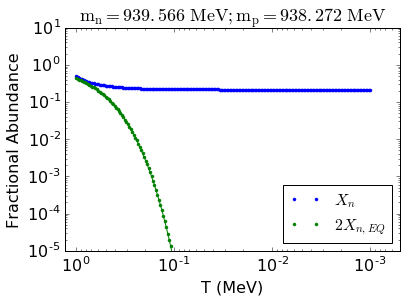

NOT RETURNING TAU_N but TAU_P
Q=  -1.294
tauN=  886.7


/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: overflow encountered in exp


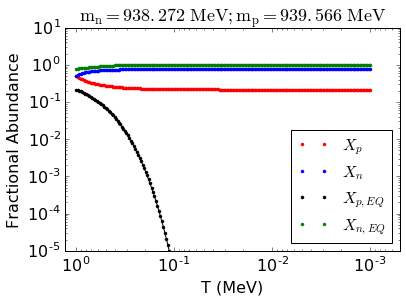

Q=  940.86
tauN=  443.35


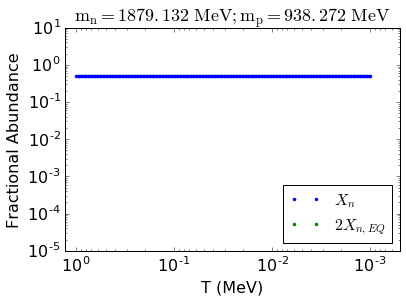

Q=  0.1876544
tauN=  887.745326391


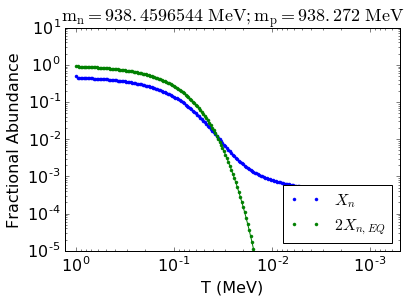

In [7]:
Qs= {}
for key in mass_n:
    factor= 2.
    yMin= 10**-5
    yMax=10**1
    if (key==1):factor= 1.
        
    Qs[key]= neutronAbundance(mass_p[key], mass_n[key], [0.5], 
                 title= '$\mathrm{m_n= %s\ MeV; m_p= %s \ MeV}$'%(mass_n[key], mass_p[key]),  mn0= mass_n[0],
                 xEqFactorToPlot= factor, yMin= yMin, yMax= yMax,
                              savePlots= True, outDir= outputDir, filenameTag= 'Case%.f_'%(key+1))
                                                      

In [8]:
Qs

{0: 1.2939999999999827,
 1: -1.2939999999999827,
 2: 940.86,
 3: 0.1876543999999285}

In [9]:
colors= ['b', 'r', 'g']

NOT RETURNING TAU_N but TAU_P


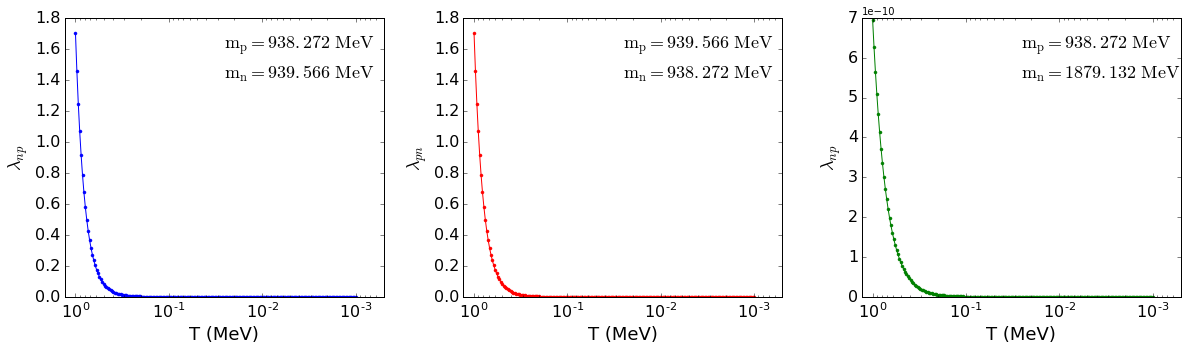

In [10]:
fig, ax = plt.subplots(1,3)
fig.subplots_adjust(wspace=.25)
fontsize, tickLabelFontSize, legendFontSize= 18, 16, 16
T = np.logspace(0,-3, 200)

for key in Qs.keys()[0:3]:
    x= Qs[key]/T
    tauN= tauNeutron(Qs[key], mass_n[0], mass_n[key])
    lambdaNP = lambda_NP(abs(x), tauN)
    ax[key].plot(T, lambdaNP, '.', color= colors[key], 
                 label= '$\mathrm{m_n= %s\ MeV; m_p= %s \ MeV}$'%(mass_n[key], mass_p[key]))
    ax[key].plot(T, lambdaNP, color= colors[key],)

    ax[key].invert_xaxis()
    ax[key].set_xlim(1.3, 0.0005)
    ax[key].text(0.5, 0.8,
                 '$\mathrm{m_n= %s\ MeV}$'%(mass_n[key]), 
                 horizontalalignment='left',
                 verticalalignment='center', fontsize= 18,
                 transform = ax[key].transAxes)    
    ax[key].text(0.5, 0.9,
                 '$\mathrm{m_p= %s \ MeV}$'%(mass_p[key]), 
                 horizontalalignment='left',
                 verticalalignment='center', fontsize= 18,
                 transform = ax[key].transAxes)
    
    ax[key].set_xlabel('T (MeV)', fontsize= fontsize)
    if (Qs[key]<0):
        ax[key].set_ylabel(r'$\lambda_{pn}$', fontsize= fontsize)
    else:
        ax[key].set_ylabel(r'$\lambda_{np}$', fontsize= fontsize)
    ax[key].set_xscale('log')
    ax[key].tick_params(axis='x', labelsize=tickLabelFontSize)
    ax[key].tick_params(axis='y', labelsize=tickLabelFontSize)
fig.set_size_inches(20,5)
os.chdir(outputDir)
plt.savefig('lambdaNP.pdf',bbox_inches='tight', format= 'pdf')
os.chdir(workDir)

plt.show()

In [11]:
for key in Qs.keys()[0:3]:
    print H1(Qs[key])

1.13174854906
1.13174854906
598317.084706
